In [134]:
#install.packages("dlookr","mice")
#install.packages("VIM")

In [6]:
library(lubridate)
library(dlookr)
library(dplyr)
library(mice)
library(VIM)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: mice


Attaching package: 'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'dlookr'


The following object is masked from 'package:base':

    transform



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

 

In [7]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/1_percent_data_head.csv.gz",temp2)
data <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "5.94000000000051S"


In [8]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/1_percent_data.csv.gz",temp2)
data2 <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "9.89999999999964S"


In [9]:
data$service[data$service==""] <- NA
head(data)
data2$service[data2$service==""] <- NA

,ts,uid,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1331901000,CCUIP21wTjqkj8ZqX5,192.168.202.79,50463,192.168.229.251,80,tcp,NA,NA,NA,NA,SH,0,Fa,1,52,1,52
2,1331901000,Csssjd3tX0yOTPDpng,192.168.202.79,46117,192.168.229.254,443,tcp,NA,NA,NA,NA,SF,0,dDafFr,3,382,9,994
3,1331901000,CHEt7z3AzG4gyCNgci,192.168.202.79,50465,192.168.229.251,80,tcp,http,0.01,166,214,SF,0,ShADfFa,4,382,3,382
4,1331901000,CKnDAp2ohlvN6rpiXl,192.168.202.79,50467,192.168.229.251,80,tcp,http,0.01,166,214,SF,0,ShADfFa,4,382,3,382
5,1331901000,CGUBcoXKxBE8gTNl,192.168.202.79,46119,192.168.229.254,443,tcp,ssl,0.02,544,1060,SF,0,ShADadfFr,8,968,13,1744
6,1331901000,CRksHc2i8qahpGOP19,192.168.202.79,46121,192.168.229.254,443,tcp,ssl,0.01,544,1060,SF,0,ShADadfFr,8,968,13,1744


In [10]:
for(i in c(4,6)) data[,i]=as.numeric(data[,i])
for(i in c(4,6)) data2[,i]=as.numeric(data2[,i])

In [11]:
diagnose(data)
print("No. of entries in data:")
nrow(data)
class(data)

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
ts,numeric,0,0.00000,8231,3.626902e-02
uid,character,0,0.00000,226943,1.000000e+00
orig_ip,character,0,0.00000,72,3.172603e-04
orig_port,numeric,0,0.00000,5289,2.330541e-02
resp_ip,character,0,0.00000,517,2.278105e-03
resp_port,numeric,0,0.00000,28117,1.238945e-01
proto,character,0,0.00000,3,1.321918e-05
service,character,225579,99.39897,6,2.643836e-05
duration,numeric,82146,36.19675,1040,4.582649e-03


[1] "No. of entries in data:"


[1] 226943

[1] "data.frame"

In [12]:
diagnose(data2)
print("No. of entries in data:")
nrow(data2)
class(data2)

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
ts,numeric,0,0.00000,167908,7.398686e-01
uid,character,0,0.00000,226943,1.000000e+00
orig_ip,character,0,0.00000,179,7.887443e-04
orig_port,numeric,0,0.00000,50876,2.241796e-01
resp_ip,character,0,0.00000,2764,1.217927e-02
resp_port,numeric,0,0.00000,54572,2.404657e-01
proto,character,0,0.00000,3,1.321918e-05
service,character,220157,97.00982,9,3.965754e-05
duration,numeric,187905,82.79832,1024,4.512146e-03


[1] "No. of entries in data:"


[1] 226943

[1] "data.frame"

We see that every entry in uid is unique, therefore there are no trends that we'll be able to observe and so we can cut the column.

In [168]:
if("uid" %in% colnames(data))
{
    data <- subset(data, select = -c(uid));
}
head(data)

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
,<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,1331901000,192.168.202.79,50463,192.168.229.251,80,tcp,NA,NA,NA,NA,SH,0,Fa,1,52,1,52
2,1331901000,192.168.202.79,46117,192.168.229.254,443,tcp,NA,NA,NA,NA,SF,0,dDafFr,3,382,9,994
3,1331901000,192.168.202.79,50465,192.168.229.251,80,tcp,http,0.01,166,214,SF,0,ShADfFa,4,382,3,382
4,1331901000,192.168.202.79,50467,192.168.229.251,80,tcp,http,0.01,166,214,SF,0,ShADfFa,4,382,3,382
5,1331901000,192.168.202.79,46119,192.168.229.254,443,tcp,ssl,0.02,544,1060,SF,0,ShADadfFr,8,968,13,1744
6,1331901000,192.168.202.79,46121,192.168.229.254,443,tcp,ssl,0.01,544,1060,SF,0,ShADadfFr,8,968,13,1744


In [169]:
as.data.frame(colSums(is.na(data)))

,colSums(is.na(data))
,<dbl>
ts,0
orig_ip,0
orig_port,0
resp_ip,0
resp_port,0
proto,0
service,225579
duration,82146
orig_bytes,82146


In [170]:
nrow(data[!complete.cases(data),])
cut_data <- na.omit(data)
nrow(cut_data)

[1] 226181

[1] 762

In [171]:
summary(data)

       ts              orig_ip            orig_port       resp_ip         
 Min.   :1.332e+09   Length:226943      Min.   :    3   Length:226943     
 1st Qu.:1.332e+09   Class :character   1st Qu.:63805   Class :character  
 Median :1.332e+09   Mode  :character   Median :63805   Mode  :character  
 Mean   :1.332e+09                      Mean   :63109                     
 3rd Qu.:1.332e+09                      3rd Qu.:63805                     
 Max.   :1.332e+09                      Max.   :65456                     
                                                                          
   resp_port        proto             service             duration     
 Min.   :    0   Length:226943      Length:226943      Min.   :  0.01  
 1st Qu.:18191   Class :character   Class :character   1st Qu.:  0.01  
 Median :33550   Mode  :character   Mode  :character   Median :  0.03  
 Mean   :33224                                         Mean   :  0.37  
 3rd Qu.:48911                          

Cutting out missing data seems unacceptable in this case as we would be left with only 762 of our original 226943 rows. That's only 0.336% of our original data!

'data.frame':	226943 obs. of  17 variables:
 $ ts           : num  1.33e+09 1.33e+09 1.33e+09 1.33e+09 1.33e+09 ...
 $ orig_ip      : chr  "192.168.202.79" "192.168.202.79" "192.168.202.79" "192.168.202.79" ...
 $ orig_port    : int  50463 46117 50465 50467 46119 46121 46123 50469 50471 50473 ...
 $ resp_ip      : chr  "192.168.229.251" "192.168.229.254" "192.168.229.251" "192.168.229.251" ...
 $ resp_port    : int  80 443 80 80 443 443 443 80 80 80 ...
 $ proto        : chr  "tcp" "tcp" "tcp" "tcp" ...
 $ service      : chr  NA NA "http" "http" ...
 $ duration     : num  NA NA 0.01 0.01 0.02 0.01 0.01 0.02 0.01 0.01 ...
 $ orig_bytes   : int  NA NA 166 166 544 544 548 166 166 164 ...
 $ resp_bytes   : int  NA NA 214 214 1060 1060 1060 214 214 214 ...
 $ conn_state   : chr  "SH" "SF" "SF" "SF" ...
 $ missed_bytes : int  0 0 0 0 0 0 0 0 0 0 ...
 $ history      : chr  "Fa" "dDafFr" "ShADfFa" "ShADfFa" ...
 $ orig_pkts    : int  1 3 4 4 8 8 8 4 4 4 ...
 $ orig_ip_bytes: int  52 382 382 38

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes,service,
762,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
144035,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
602,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,3
81544,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,4
,0,0,0,0,0,0,0,0,0,0,0,0,0,82146,82146,82146,225579,472017


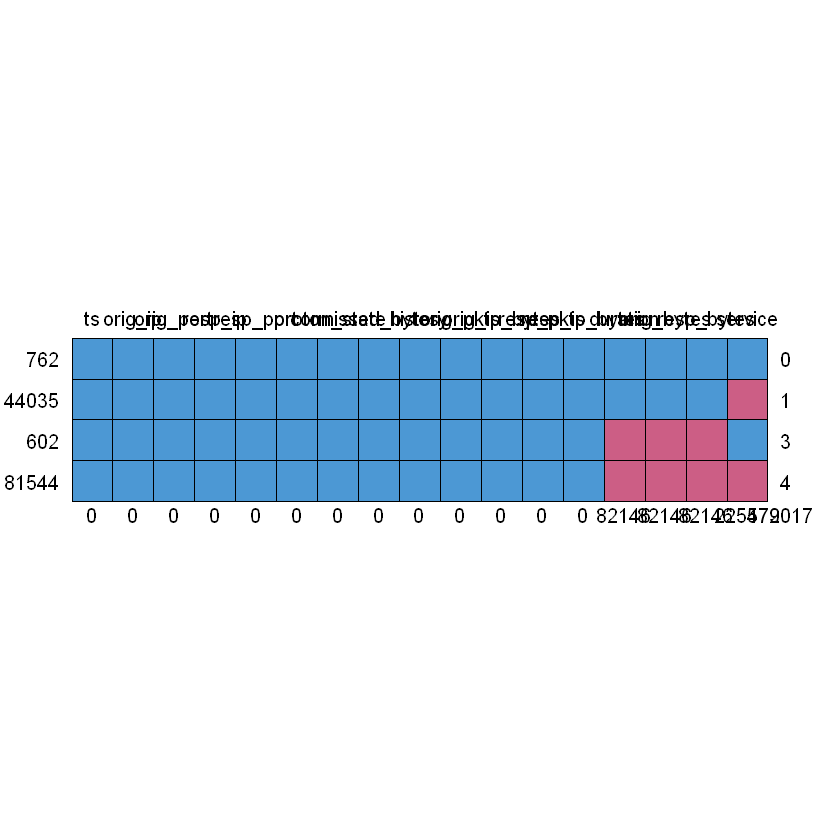

In [180]:
str(data)
md.pattern(data)

Above shows us that 762 rows are not missing any data, 144035 are just missing the `service`, 602 are missing `duration`, `orig_bytes`, and `resp_bytes`, but have service, and 81544 are missing all 4 variables.


 Variables sorted by number of missings: 
   Variable     Count
    service 0.9939897
   duration 0.3619675
 orig_bytes 0.3619675
 resp_bytes 0.3619675


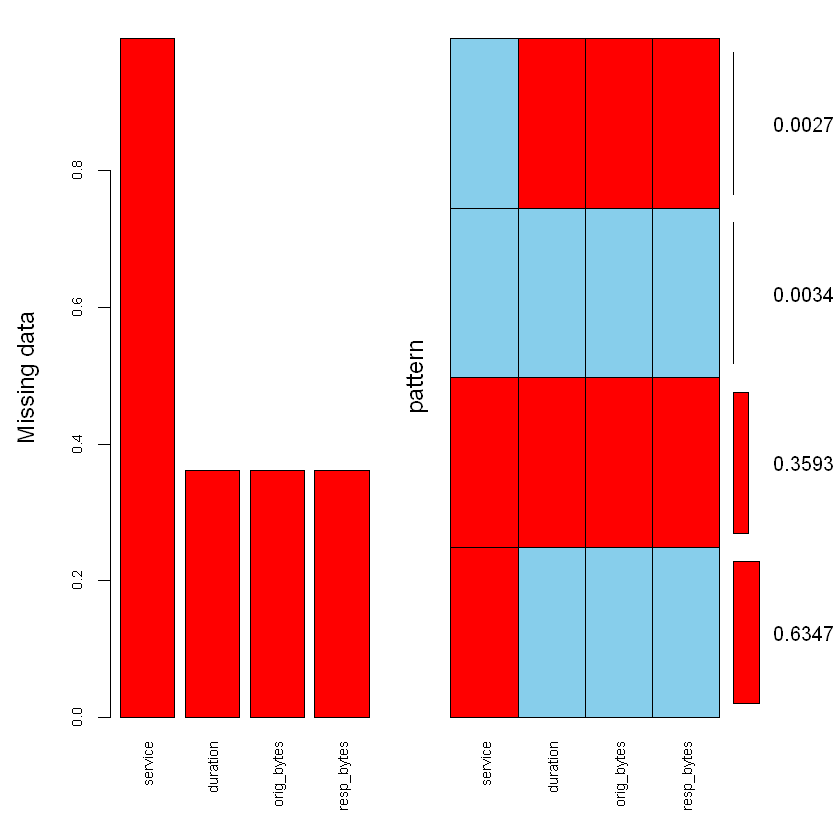

In [13]:
data_mis <- subset(data, select = c(service,duration,orig_bytes,resp_bytes))
mice_plot <- aggr(data_mis,numbers=TRUE, sortVars=TRUE,labels=c("service","duration","orig_bytes","resp_bytes"),cex.axis=.7,gap=3, ylab=c("Missing data","pattern"))

In [178]:
#init <- mice(data,maxit=0)
#meth = init$method
#predM = init$predictorMatrix
#meth[c("ts","orig_ip","orig_port","resp_ip","resp_port","proto","conn_state",
       "missed_bytes","history","orig_pkts","orig_ip_bytes","resp_pkts","resp_ip_bytes")] <- ""
#meth[c("service","duration","orig_bytes","resp_bytes")] <- "pmm"

Warning message:
"Number of logged events: 12"


In [186]:
#set.seed(462)
#data_impute <- mice(data,  m=5, method=meth, maxit = 20)
#impute_data <- mice(data,m=5,maxit=50,meth="pmm",see=462)
#summary(impute_data)

In [159]:
#head(data_impute$imp$duration)

,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.03,27.94,0.02,30.89,0.01
2,0.03,0.02,0.02,30.89,0.01
32,0.02,2.08,0.02,27.88,30.00
81,0.18,2.08,0.02,0.35,30.00
162,0.02,56.61,0.06,27.88,0.04
264,0.02,56.61,0.06,0.35,0.04


In [ ]:
fit <- with(data = iris.mis, exp = lm())

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"84 y values <= 0 omitted from logarithmic plot"


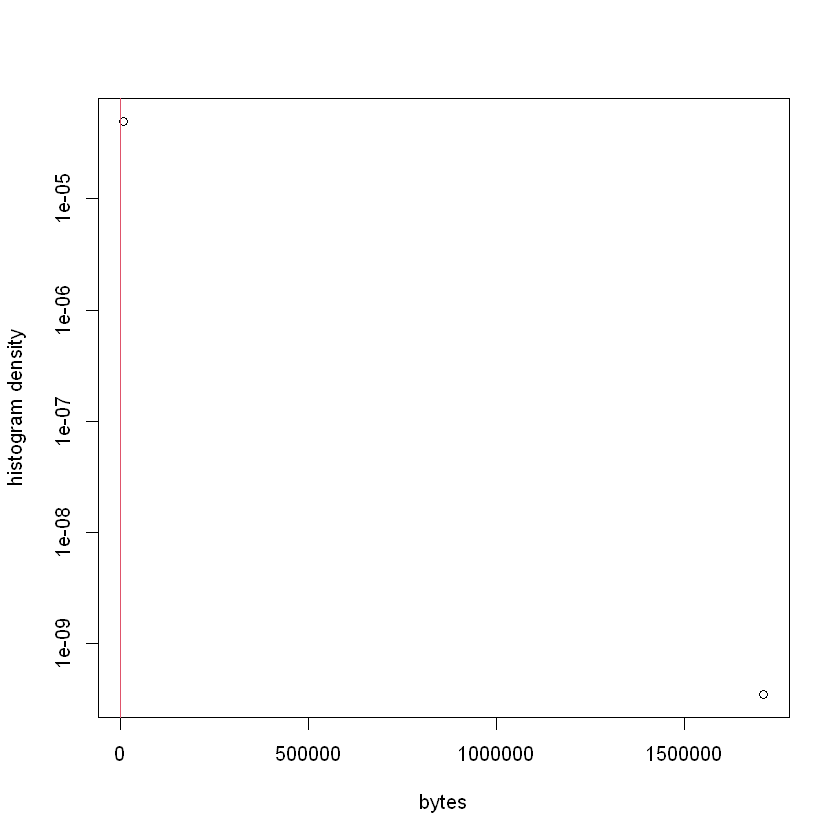

In [111]:
nbreaks=100 ## Choose this
thist=hist(data[,"resp_bytes"],breaks=nbreaks,plot=FALSE)
plot(thist$mids,thist$density,log="y",type="b",
     xlab="bytes",ylab="histogram density")
threshold=1200 # obvious threshold
abline(v=threshold,col=2)

In [110]:
resp_port_count <- as.data.frame(table(data$resp_port))
resp_port_count <- resp_port_count[order(-resp_port_count$Freq),]
rownames(resp_port_count) <- 1:nrow(resp_port_count)
colnames(resp_port_count) <- c("Port Number", "Frequency")
head(resp_port_count,10)

,Port Number,Frequency
,<fct>,<int>
1,49160,2196
2,445,1550
3,443,1246
4,53,668
5,80,668
6,137,155
7,139,70
8,67,59
9,9001,57


In [109]:
orig_port_count <- as.data.frame(table(data$orig_port))
orig_port_count <- orig_port_count[order(-orig_port_count$Freq),]
rownames(resp_port_count) <- 1:nrow(resp_port_count)
colnames(resp_port_count) <- c("Port Number", "Frequency")
head(orig_port_count,10)

,Var1,Freq
,<fct>,<int>
5230,63805,192329
5231,63806,27261
1391,45658,260
261,21371,119
9,137,112
1392,45659,106
3,68,59
6,134,50
10,138,40


Warning message in breaks[-1L] + breaks[-nB]:
"NAs produced by integer overflow"


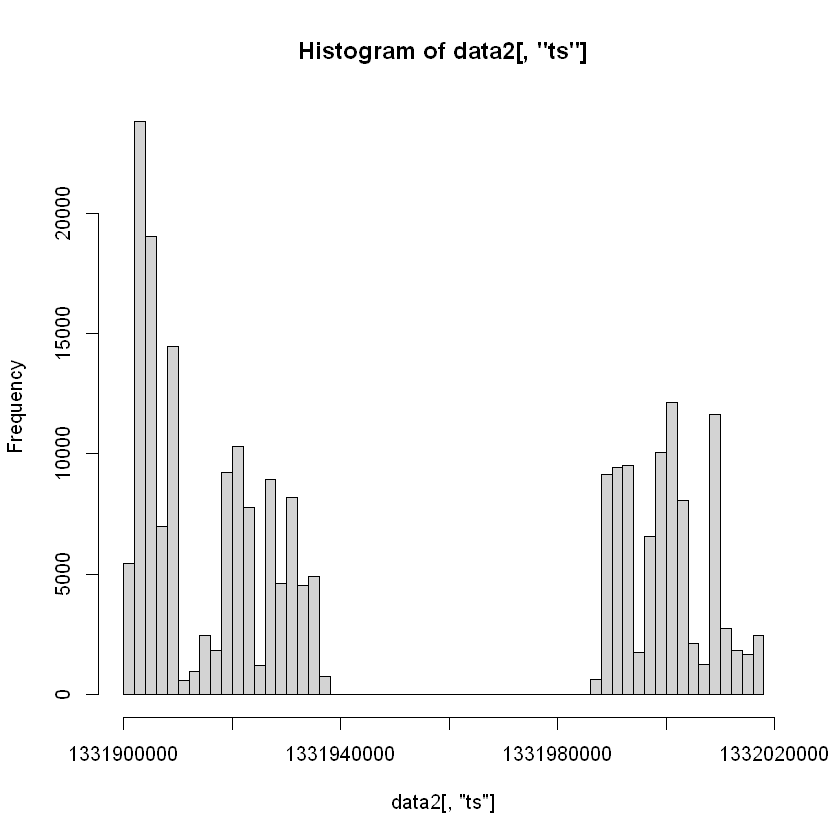

In [118]:
hist(data2[,"ts"],breaks=50)

[Missing Data in R](https://www.statmethods.net/input/missingdata.html)
[Missing data in R medium article](https://medium.com/coinmonks/dealing-with-missing-data-using-r-3ae428da2d17)
[Missing data in R with MICE](https://datascienceplus.com/imputing-missing-data-with-r-mice-package/)